In [ ]:
!pip install keras-ocr
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 746.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import keras_ocr

import os
from glob import glob
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4'

In [ ]:
!ls '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images'

image100.jpg  image136.jpg  image171.jpg  image206.jpg	image241.jpg  image34.jpg  image6.jpg
image101.jpg  image137.jpg  image172.jpg  image207.jpg	image242.jpg  image35.jpg  image70.jpg
image102.jpg  image138.jpg  image173.jpg  image208.jpg	image243.jpg  image36.jpg  image71.jpg
image103.jpg  image139.jpg  image174.jpg  image209.jpg	image244.jpg  image37.jpg  image72.jpg
image104.jpg  image13.jpg   image175.jpg  image20.jpg	image245.jpg  image38.jpg  image73.jpg
image105.jpg  image140.jpg  image176.jpg  image210.jpg	image246.jpg  image39.jpg  image74.jpg
image106.jpg  image141.jpg  image177.jpg  image211.jpg	image247.jpg  image3.jpg   image75.jpg
image107.jpg  image142.jpg  image178.jpg  image212.jpg	image248.jpg  image40.jpg  image76.jpg
image108.jpg  image143.jpg  image179.jpg  image213.jpg	image249.jpg  image41.jpg  image77.jpg
image109.jpg  image144.jpg  image17.jpg   image214.jpg	image24.jpg   image42.jpg  image78.jpg
image10.jpg   image145.jpg  image180.jpg  image215.jpg	image25

In [ ]:
imgPaths = glob(dataset_path + '/images/*.jpg')
print(imgPaths)

['/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image48.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image96.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image97.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image53.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image91.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image122.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image80.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image126.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image61.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image70.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image116.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image12.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labeling/v4/images/image29.jpg', '/content/drive/MyDrive/MedEase/Dataset/Labelin

In [ ]:
# Function to perform OCR on an image using keras-ocr
def perform_ocr(image_path, pipeline):
    images = [keras_ocr.tools.read(image_path)]
    predictions = pipeline.recognize(images)
    return predictions

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

ocr_results = [] #list
# subset_img_paths = imgPaths[:5]
for imgPath in tqdm(imgPaths, desc='Medicine'):
    _, filename = os.path.split(imgPath)

    #inference ocr
    data = perform_ocr(imgPath, pipeline)

    #extract data and text to list
    text_results = []
    for text_result in data[0]:
      text = text_result[0]
      text_results.append({'id': filename, 'text': text})

    #append text results to the ocr results
    ocr_results.extend(text_results)

#export it to dataframe
allMedicine = pd.DataFrame(ocr_results)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


Medicine:   0%|          | 0/132 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


Medicine:   1%|          | 1/132 [00:19<43:00, 19.70s/it]

1/1 [==============================] - 1s 829ms/step


Medicine:   2%|▏         | 2/132 [00:22<21:05,  9.73s/it]

4/4 [==============================] - 3s 427ms/step


Medicine:   2%|▏         | 3/132 [00:28<17:36,  8.19s/it]

2/2 [==============================] - 1s 889ms/step


Medicine:   3%|▎         | 4/132 [00:30<12:14,  5.74s/it]

1/1 [==============================] - 1s 1s/step


Medicine:   4%|▍         | 5/132 [00:32<09:13,  4.36s/it]

3/3 [==============================] - 1s 526ms/step


Medicine:   5%|▍         | 6/132 [00:34<07:37,  3.63s/it]

2/2 [==============================] - 1s 653ms/step


Medicine:   5%|▌         | 7/132 [00:36<06:24,  3.08s/it]

1/1 [==============================] - 1s 1s/step


Medicine:   6%|▌         | 8/132 [00:38<05:31,  2.67s/it]

2/2 [==============================] - 0s 31ms/step


Medicine:   7%|▋         | 9/132 [00:39<04:19,  2.11s/it]

2/2 [==============================] - 2s 2s/step


Medicine:   8%|▊         | 10/132 [00:41<04:27,  2.20s/it]

3/3 [==============================] - 0s 207ms/step


Medicine:   8%|▊         | 11/132 [00:43<03:52,  1.92s/it]

2/2 [==============================] - 1s 1s/step


Medicine:   9%|▉         | 12/132 [00:46<04:43,  2.36s/it]

2/2 [==============================] - 1s 1s/step


Medicine:  10%|▉         | 13/132 [00:50<05:29,  2.77s/it]

3/3 [==============================] - 0s 52ms/step


Medicine:  11%|█         | 14/132 [00:51<04:33,  2.32s/it]

2/2 [==============================] - 1s 952ms/step


Medicine:  11%|█▏        | 15/132 [00:53<04:14,  2.18s/it]

1/1 [==============================] - 0s 45ms/step


Medicine:  12%|█▏        | 16/132 [00:54<03:21,  1.74s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  13%|█▎        | 17/132 [00:56<03:31,  1.84s/it]

2/2 [==============================] - 1s 1s/step


Medicine:  14%|█▎        | 18/132 [00:59<04:18,  2.27s/it]

1/1 [==============================] - 2s 2s/step


Medicine:  14%|█▍        | 19/132 [01:01<04:15,  2.26s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  15%|█▌        | 20/132 [01:04<04:15,  2.28s/it]

2/2 [==============================] - 0s 37ms/step


Medicine:  16%|█▌        | 21/132 [01:05<03:30,  1.89s/it]

3/3 [==============================] - 0s 49ms/step


Medicine:  17%|█▋        | 22/132 [01:06<03:16,  1.78s/it]

1/1 [==============================] - 0s 111ms/step


Medicine:  17%|█▋        | 23/132 [01:07<02:48,  1.55s/it]

1/1 [==============================] - 0s 137ms/step


Medicine:  18%|█▊        | 24/132 [01:08<02:35,  1.44s/it]

5/5 [==============================] - 1s 233ms/step


Medicine:  19%|█▉        | 25/132 [01:11<03:18,  1.85s/it]

1/1 [==============================] - 0s 66ms/step


Medicine:  20%|█▉        | 26/132 [01:12<02:51,  1.61s/it]

3/3 [==============================] - 2s 764ms/step


Medicine:  20%|██        | 27/132 [01:16<03:46,  2.16s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  21%|██        | 28/132 [01:18<03:39,  2.11s/it]

1/1 [==============================] - 1s 1s/step


Medicine:  22%|██▏       | 29/132 [01:20<03:33,  2.08s/it]

2/2 [==============================] - 1s 428ms/step


Medicine:  23%|██▎       | 30/132 [01:21<03:20,  1.97s/it]

3/3 [==============================] - 0s 59ms/step


Medicine:  23%|██▎       | 31/132 [01:23<03:02,  1.81s/it]

1/1 [==============================] - 1s 703ms/step


Medicine:  24%|██▍       | 32/132 [01:24<02:46,  1.67s/it]

9/9 [==============================] - 1s 55ms/step


Medicine:  25%|██▌       | 33/132 [01:26<02:57,  1.80s/it]

1/1 [==============================] - 0s 54ms/step


Medicine:  26%|██▌       | 34/132 [01:27<02:23,  1.47s/it]

1/1 [==============================] - 1s 614ms/step


Medicine:  27%|██▋       | 35/132 [01:28<02:15,  1.40s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  27%|██▋       | 36/132 [01:29<01:52,  1.18s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  28%|██▊       | 37/132 [01:29<01:37,  1.02s/it]

2/2 [==============================] - 2s 2s/step


Medicine:  29%|██▉       | 38/132 [01:32<02:14,  1.43s/it]

1/1 [==============================] - 0s 77ms/step


Medicine:  30%|██▉       | 39/132 [01:33<01:56,  1.25s/it]

2/2 [==============================] - 0s 39ms/step


Medicine:  30%|███       | 40/132 [01:34<01:56,  1.26s/it]

2/2 [==============================] - 0s 60ms/step


Medicine:  31%|███       | 41/132 [01:35<01:59,  1.31s/it]

4/4 [==============================] - 0s 138ms/step


Medicine:  32%|███▏      | 42/132 [01:37<02:13,  1.49s/it]

1/1 [==============================] - 0s 39ms/step


Medicine:  33%|███▎      | 43/132 [01:38<01:53,  1.27s/it]

1/1 [==============================] - 0s 56ms/step


Medicine:  33%|███▎      | 44/132 [01:39<01:44,  1.19s/it]

6/6 [==============================] - 0s 58ms/step


Medicine:  34%|███▍      | 45/132 [01:40<01:51,  1.28s/it]

1/1 [==============================] - 1s 804ms/step


Medicine:  35%|███▍      | 46/132 [01:42<02:01,  1.41s/it]

1/1 [==============================] - 0s 41ms/step


Medicine:  36%|███▌      | 47/132 [01:43<01:40,  1.18s/it]

1/1 [==============================] - 0s 60ms/step


Medicine:  36%|███▋      | 48/132 [01:44<01:27,  1.04s/it]

1/1 [==============================] - 0s 40ms/step


Medicine:  37%|███▋      | 49/132 [01:45<01:24,  1.01s/it]

1/1 [==============================] - 0s 62ms/step


Medicine:  38%|███▊      | 50/132 [01:45<01:15,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Medicine:  39%|███▊      | 51/132 [01:46<01:14,  1.09it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  39%|███▉      | 52/132 [01:47<01:08,  1.16it/s]

2/2 [==============================] - 0s 58ms/step


Medicine:  40%|████      | 53/132 [01:48<01:10,  1.12it/s]

1/1 [==============================] - 0s 57ms/step


Medicine:  41%|████      | 54/132 [01:49<01:14,  1.05it/s]

1/1 [==============================] - 0s 77ms/step


Medicine:  42%|████▏     | 55/132 [01:50<01:13,  1.05it/s]

2/2 [==============================] - 1s 483ms/step


Medicine:  42%|████▏     | 56/132 [01:51<01:25,  1.12s/it]

1/1 [==============================] - 0s 80ms/step


Medicine:  43%|████▎     | 57/132 [01:53<01:25,  1.14s/it]

1/1 [==============================] - 0s 44ms/step


Medicine:  44%|████▍     | 58/132 [01:53<01:16,  1.04s/it]

4/4 [==============================] - 0s 46ms/step


Medicine:  45%|████▍     | 59/132 [01:55<01:19,  1.09s/it]

1/1 [==============================] - 0s 36ms/step


Medicine:  45%|████▌     | 60/132 [01:55<01:09,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


Medicine:  46%|████▌     | 61/132 [01:56<01:01,  1.16it/s]

1/1 [==============================] - 0s 66ms/step


Medicine:  47%|████▋     | 62/132 [01:57<00:57,  1.22it/s]

2/2 [==============================] - 1s 517ms/step


Medicine:  48%|████▊     | 63/132 [01:58<01:05,  1.05it/s]

2/2 [==============================] - 0s 25ms/step


Medicine:  48%|████▊     | 64/132 [01:59<01:02,  1.09it/s]

3/3 [==============================] - 0s 46ms/step


Medicine:  49%|████▉     | 65/132 [02:00<01:05,  1.02it/s]

1/1 [==============================] - 0s 55ms/step


Medicine:  50%|█████     | 66/132 [02:01<00:59,  1.12it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  51%|█████     | 67/132 [02:01<00:54,  1.19it/s]

1/1 [==============================] - 0s 53ms/step


Medicine:  52%|█████▏    | 68/132 [02:02<00:51,  1.25it/s]

3/3 [==============================] - 0s 41ms/step


Medicine:  52%|█████▏    | 69/132 [02:03<00:52,  1.20it/s]

1/1 [==============================] - 0s 51ms/step


Medicine:  53%|█████▎    | 70/132 [02:04<00:49,  1.26it/s]

1/1 [==============================] - 0s 81ms/step


Medicine:  54%|█████▍    | 71/132 [02:04<00:50,  1.21it/s]

1/1 [==============================] - 0s 51ms/step


Medicine:  55%|█████▍    | 72/132 [02:06<00:53,  1.12it/s]

1/1 [==============================] - 0s 414ms/step


Medicine:  55%|█████▌    | 73/132 [02:07<00:58,  1.01it/s]

1/1 [==============================] - 0s 73ms/step


Medicine:  56%|█████▌    | 74/132 [02:08<00:59,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


Medicine:  57%|█████▋    | 75/132 [02:09<01:00,  1.06s/it]

1/1 [==============================] - 0s 38ms/step


Medicine:  58%|█████▊    | 76/132 [02:10<00:53,  1.04it/s]

1/1 [==============================] - 0s 36ms/step


Medicine:  58%|█████▊    | 77/132 [02:10<00:47,  1.16it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  59%|█████▉    | 78/132 [02:11<00:44,  1.22it/s]

1/1 [==============================] - 0s 61ms/step


Medicine:  60%|█████▉    | 79/132 [02:12<00:42,  1.26it/s]

2/2 [==============================] - 0s 60ms/step


Medicine:  61%|██████    | 80/132 [02:13<00:43,  1.20it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  61%|██████▏   | 81/132 [02:13<00:40,  1.25it/s]

1/1 [==============================] - 0s 62ms/step


Medicine:  62%|██████▏   | 82/132 [02:14<00:43,  1.14it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  63%|██████▎   | 83/132 [02:15<00:40,  1.21it/s]

1/1 [==============================] - 0s 41ms/step


Medicine:  64%|██████▎   | 84/132 [02:16<00:37,  1.29it/s]

1/1 [==============================] - 0s 43ms/step


Medicine:  64%|██████▍   | 85/132 [02:17<00:35,  1.33it/s]

1/1 [==============================] - 0s 58ms/step


Medicine:  65%|██████▌   | 86/132 [02:17<00:33,  1.36it/s]

1/1 [==============================] - 0s 41ms/step


Medicine:  66%|██████▌   | 87/132 [02:18<00:32,  1.38it/s]

1/1 [==============================] - 0s 60ms/step


Medicine:  67%|██████▋   | 88/132 [02:19<00:31,  1.38it/s]

1/1 [==============================] - 0s 46ms/step


Medicine:  67%|██████▋   | 89/132 [02:19<00:30,  1.40it/s]

1/1 [==============================] - 0s 69ms/step


Medicine:  68%|██████▊   | 90/132 [02:20<00:34,  1.20it/s]

1/1 [==============================] - 0s 76ms/step


Medicine:  69%|██████▉   | 91/132 [02:21<00:34,  1.17it/s]

1/1 [==============================] - 2s 2s/step


Medicine:  70%|██████▉   | 92/132 [02:24<00:53,  1.35s/it]

1/1 [==============================] - 0s 87ms/step


Medicine:  70%|███████   | 93/132 [02:25<00:47,  1.22s/it]

1/1 [==============================] - 0s 44ms/step


Medicine:  71%|███████   | 94/132 [02:26<00:41,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


Medicine:  72%|███████▏  | 95/132 [02:26<00:35,  1.03it/s]

1/1 [==============================] - 0s 37ms/step


Medicine:  73%|███████▎  | 96/132 [02:27<00:34,  1.04it/s]

2/2 [==============================] - 0s 49ms/step


Medicine:  73%|███████▎  | 97/132 [02:28<00:32,  1.06it/s]

1/1 [==============================] - 0s 46ms/step


Medicine:  74%|███████▍  | 98/132 [02:29<00:29,  1.15it/s]

1/1 [==============================] - 0s 62ms/step


Medicine:  75%|███████▌  | 99/132 [02:30<00:27,  1.20it/s]

1/1 [==============================] - 0s 44ms/step


Medicine:  76%|███████▌  | 100/132 [02:30<00:25,  1.26it/s]

2/2 [==============================] - 0s 36ms/step


Medicine:  77%|███████▋  | 101/132 [02:31<00:25,  1.20it/s]

2/2 [==============================] - 0s 56ms/step


Medicine:  77%|███████▋  | 102/132 [02:32<00:25,  1.16it/s]

1/1 [==============================] - 0s 65ms/step


Medicine:  78%|███████▊  | 103/132 [02:33<00:24,  1.21it/s]

2/2 [==============================] - 0s 57ms/step


Medicine:  79%|███████▉  | 104/132 [02:34<00:24,  1.15it/s]

3/3 [==============================] - 0s 53ms/step


Medicine:  80%|███████▉  | 105/132 [02:35<00:24,  1.08it/s]

3/3 [==============================] - 0s 51ms/step


Medicine:  80%|████████  | 106/132 [02:37<00:33,  1.28s/it]

2/2 [==============================] - 0s 64ms/step


Medicine:  81%|████████  | 107/132 [02:38<00:33,  1.33s/it]

3/3 [==============================] - 0s 49ms/step


Medicine:  82%|████████▏ | 108/132 [02:40<00:34,  1.43s/it]

2/2 [==============================] - 0s 59ms/step


Medicine:  83%|████████▎ | 109/132 [02:41<00:32,  1.39s/it]

1/1 [==============================] - 0s 45ms/step


Medicine:  83%|████████▎ | 110/132 [02:42<00:26,  1.19s/it]

1/1 [==============================] - 0s 61ms/step


Medicine:  84%|████████▍ | 111/132 [02:43<00:22,  1.05s/it]

2/2 [==============================] - 0s 28ms/step


Medicine:  85%|████████▍ | 112/132 [02:44<00:19,  1.01it/s]

1/1 [==============================] - 0s 78ms/step


Medicine:  86%|████████▌ | 113/132 [02:44<00:17,  1.08it/s]

2/2 [==============================] - 0s 34ms/step


Medicine:  86%|████████▋ | 114/132 [02:45<00:16,  1.09it/s]

6/6 [==============================] - 0s 58ms/step


Medicine:  87%|████████▋ | 115/132 [02:47<00:20,  1.20s/it]

4/4 [==============================] - 0s 50ms/step


Medicine:  88%|████████▊ | 116/132 [02:48<00:19,  1.21s/it]

3/3 [==============================] - 0s 60ms/step


Medicine:  89%|████████▊ | 117/132 [02:50<00:17,  1.19s/it]

3/3 [==============================] - 0s 43ms/step


Medicine:  89%|████████▉ | 118/132 [02:51<00:15,  1.14s/it]

2/2 [==============================] - 0s 68ms/step


Medicine:  90%|█████████ | 119/132 [02:52<00:15,  1.22s/it]

2/2 [==============================] - 0s 37ms/step


Medicine:  91%|█████████ | 120/132 [02:53<00:15,  1.26s/it]

2/2 [==============================] - 0s 59ms/step


Medicine:  92%|█████████▏| 121/132 [02:55<00:14,  1.33s/it]

7/7 [==============================] - 0s 59ms/step


Medicine:  92%|█████████▏| 122/132 [02:57<00:16,  1.63s/it]

1/1 [==============================] - 0s 53ms/step


Medicine:  93%|█████████▎| 123/132 [02:58<00:12,  1.36s/it]

2/2 [==============================] - 0s 58ms/step


Medicine:  94%|█████████▍| 124/132 [02:59<00:09,  1.25s/it]

3/3 [==============================] - 0s 38ms/step


Medicine:  95%|█████████▍| 125/132 [03:00<00:08,  1.17s/it]

4/4 [==============================] - 0s 52ms/step


Medicine:  95%|█████████▌| 126/132 [03:01<00:07,  1.21s/it]

4/4 [==============================] - 0s 53ms/step


Medicine:  96%|█████████▌| 127/132 [03:02<00:06,  1.21s/it]

2/2 [==============================] - 0s 53ms/step


Medicine:  97%|█████████▋| 128/132 [03:03<00:04,  1.13s/it]

3/3 [==============================] - 0s 54ms/step


Medicine:  98%|█████████▊| 129/132 [03:04<00:03,  1.10s/it]

3/3 [==============================] - 0s 57ms/step


Medicine:  98%|█████████▊| 130/132 [03:06<00:02,  1.21s/it]

3/3 [==============================] - 0s 44ms/step


Medicine:  99%|█████████▉| 131/132 [03:07<00:01,  1.32s/it]

3/3 [==============================] - 0s 48ms/step


Medicine: 100%|██████████| 132/132 [03:09<00:00,  1.43s/it]


In [ ]:
allMedicine

NameError: ignored

In [ ]:
allMedicine.shape

(5722, 2)

In [ ]:
allMedicine.to_csv(f'{dataset_path}/data.csv', index=False)

Preprocessing

In [ ]:
import string
import re

In [ ]:
with open(f'{dataset_path}/data.txt',mode='r',encoding='utf8',errors='ignore') as f:
    text = f.read()

In [ ]:
data = list(map(lambda x:x.split('\t'),text.split('\n')))

In [ ]:
df = pd.DataFrame(data[1:],columns=data[0])

In [ ]:
df.head(10)

,id,text,tag
0,image1.jpg,sanmol,B-NAME
1,image1.jpg,forte,I-NAME
2,image1.jpg,paracetamol,B-ING
3,image1.jpg,tablet,B-TYPE
4,image1.jpg,penurun,B-DES
5,image1.jpg,panas,I-DES
6,image1.jpg,pereda,B-DES
7,image1.jpg,nyeri,I-DES
8,image1.jpg,isis,O
9,image1.jpg,4,O


Cleaning Text

In [ ]:
whitespace = string.whitespace
punctuation = "!#$%&\'()*+:;<=>?[\\]^`{|}~"
tableWhitespace = str.maketrans('','',whitespace)
tablePunctuation = str.maketrans('','',punctuation)
def cleanText(txt):
  text = str(txt)
  text = text.lower()
  removewhitespace = text.translate(tableWhitespace)
  removepunctuation = removewhitespace.translate(tablePunctuation)

  return str(removepunctuation)

In [ ]:
df['text'] = df['text'].apply(cleanText)

In [ ]:
dataClean = df.query("text != '' ")
dataClean.dropna(inplace=True)

In [ ]:
dataClean.head(10)

,id,text,tag
0,image1.jpg,sanmol,B-NAME
1,image1.jpg,forte,I-NAME
2,image1.jpg,paracetamol,B-ING
3,image1.jpg,tablet,B-TYPE
4,image1.jpg,penurun,B-DES
5,image1.jpg,panas,I-DES
6,image1.jpg,pereda,B-DES
7,image1.jpg,nyeri,I-DES
8,image1.jpg,isis,O
9,image1.jpg,4,O


Convert Data into spaCy Format

In [ ]:
group = dataClean.groupby(by='id')

In [ ]:
medicines = group.groups.keys()

In [ ]:
allMedicinesData = []
for med in medicines:
    medData = []
    grouparray = group.get_group(med)[['text', 'tag']].values
    content = ''
    annotations = {'entities':[]}
    start = 0
    end = 0
    for text, label in grouparray:
        text = str(text)
        stringLength = len(text) + 1

        start = end
        end = start + stringLength

        if label != 'O':
            annot = (start,end-1,label)
            annotations['entities'].append(annot)

        content = content + text + ' '

    medData = (content, annotations)
    allMedicinesData.append(medData)

In [ ]:
allMedicinesData

[('sanmol forte paracetamol tablet penurun panas pereda nyeri isis 4 tablet sanbe ',
  {'entities': [(0, 6, 'B-NAME'),
    (7, 12, 'I-NAME'),
    (13, 24, 'B-ING'),
    (25, 31, 'B-TYPE'),
    (32, 39, 'B-DES'),
    (40, 45, 'I-DES'),
    (46, 52, 'B-DES'),
    (53, 58, 'I-DES'),
    (66, 72, 'B-TYPE'),
    (73, 78, 'B-ORG')]}),
 ('ptkalbe farma toe bekasi indonesia no dbl b511621 simerel reg cone 463a1 tablet kunyah plantacid forte kalbe farma tbk indonesia dried aluminium hydroxide bekss gel magnesium hydroxide plan kalbe simethicone dried a tablet caibe kanyat magnes stmethic pt kalbe farma tbk reg no dbl851621 4631 labletk bekasi indonesia plantacid forte reg no dbla5162167a1 dried plantacid aluminium hydroxide gel fot magnesium hydroxide dried aluminium hydroxide simethicone be magnesium kal hydroxide simethicone e tablet kunyah bigatinnn fitaee sve tok pt berasi indonesia kalbe no dblette soaae farma tbk cerasl indonesla plantacid forte plan aluminium dried hydroxide gel dried au

Split the Data into Training and Testing Set

In [ ]:
import random
random.shuffle(allMedicinesData)

In [ ]:
len(allMedicinesData)

268

In [ ]:
TrainData = allMedicinesData[:218]
TestData = allMedicinesData[218:]

In [ ]:
print(len(TrainData))
print(len(TestData))

218
50


In [ ]:
import pickle
pickle.dump(TrainData,open(f'{dataset_path}/TrainData.pickle',mode='wb'))
pickle.dump(TestData,open(f'{dataset_path}/TestData.pickle',mode='wb'))

Training Model

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
with open(f'{dataset_path}/TrainData.pickle', 'rb') as f:
    train_data = pickle.load(f)
with open(f'{dataset_path}/TestData.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
ner = nlp.get_pipe("ner")

In [ ]:
for text, annotations in allMedicinesData:
    for _, _, label in annotations['entities']:
        ner.add_label(label)

In [ ]:
from spacy.training.example import Example

test_examples = []
for text, annotations in test_data:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotations)
    test_examples.append(example)

In [ ]:
n_iter = 30
all_ner_f1 = []
all_ner_precision = []
all_ner_recall = []
all_ner_losses = []

for epoch in range(n_iter):
  losses = {"ner": 0.0}
  for text, annotations in train_data:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotations)
    nlp.update([example], drop=0.5, losses=losses)

  with nlp.select_pipes(enable=["ner"]):
    scorer = nlp.evaluate(test_examples)
    ner_precision = scorer['ents_p']
    ner_recall = scorer['ents_r']
    ner_f1 = scorer["ents_f"]

  all_ner_f1.append(ner_f1)
  all_ner_precision.append(ner_f1)
  all_ner_recall.append(ner_f1)
  all_ner_losses.append(losses["ner"])

  print(f"Epoch {epoch + 1}, NER Precision: {ner_precision}, NER Recall: {ner_recall}, NER F1 Score: {ner_f1}, NER Loss: {losses['ner']}")

Epoch 1, NER Precision: 0.4312896405919662, NER Recall: 0.26356589147286824, NER F1 Score: 0.32718524458700887, NER Loss: 5669.0059031195115
Epoch 2, NER Precision: 0.7292225201072386, NER Recall: 0.7028423772609819, NER F1 Score: 0.7157894736842105, NER Loss: 4146.086129826534
Epoch 3, NER Precision: 0.8011444921316166, NER Recall: 0.7235142118863049, NER F1 Score: 0.7603530210454854, NER Loss: 3058.3238879948703
Epoch 4, NER Precision: 0.8419071518193224, NER Recall: 0.8669250645994832, NER F1 Score: 0.8542329726288986, NER Loss: 2391.7113317274784
Epoch 5, NER Precision: 0.8598014888337469, NER Recall: 0.8953488372093024, NER F1 Score: 0.8772151898734177, NER Loss: 2006.4952079340865
Epoch 6, NER Precision: 0.8745294855708908, NER Recall: 0.900516795865633, NER F1 Score: 0.887332908975175, NER Loss: 1750.9349957785782
Epoch 7, NER Precision: 0.8411330049261084, NER Recall: 0.8824289405684754, NER F1 Score: 0.8612862547288777, NER Loss: 1563.3340880911069
Epoch 8, NER Precision: 0.88

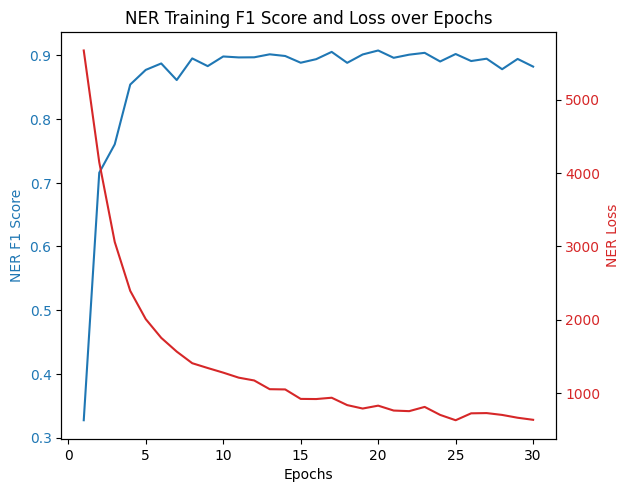

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('NER F1 Score', color=color)
ax1.plot(range(1, n_iter + 1), all_ner_f1, label='NER F1 Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('NER Loss', color=color)
ax2.plot(range(1, n_iter + 1), all_ner_losses, label='NER Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("NER Training F1 Score and Loss over Epochs")
plt.show()

In [ ]:
nlp.to_disk('/content/drive/MyDrive/MedEase/Models/NER/spaCy')

In [ ]:
results = nlp.evaluate(test_examples)

print("Precision:", results['ents_p'])
print("Recall:", results['ents_r'])
print("F1 Score:", results['ents_f'])

Precision: 0.851140456182473
Recall: 0.9160206718346253
F1 Score: 0.8823895457373989
